In [1]:
import numpy as np
import pandas as pd

import statistics

# Importing Datasets

## Importing and preprocessing metadata 

In [2]:
metadata = pd.read_csv("ds-assignment/ds-assignment/metadata.csv")
metadata

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23
...,...,...,...,...,...,...
954496,-2270332337845247,1377786228358627,Horror-Marathon,304,2022-03-22 17:40:22,2022-03-22 17:40:22
954497,-2270332334263077,1377786228362002,Horror-Marathon,588,2022-03-22 11:44:39,2022-03-22 11:44:39
954498,-2270332350350076,1377786228362682,Horror-Marathon,359,2022-03-22 12:39:41,2022-03-22 12:38:40
954499,-2270332337845247,1377786228375726,Horror-Marathon,310,2022-03-23 15:55:11,2022-03-23 15:55:11


In [3]:
# Sorting metadata based on updated_time
metadata.sort_values(by='updated_at', ascending=False, inplace=True)

In [4]:
# Creating new metadata Dataset having most recent updated time of each pratilipi
new_metadata = metadata.drop_duplicates(subset='pratilipi_id', keep='first', inplace=False, ignore_index=False)
new_metadata

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
675638,-2270332321908144,1377786228384314,shortstories,196,2022-03-23 21:39:34,2022-03-23 21:39:34
951396,-2270332321908144,1377786228337492,horror,609,2022-03-23 21:36:51,2022-03-20 22:21:25
380204,-2270332350073525,1377786223457141,romance,1098,2022-03-23 21:35:39,2021-04-27 14:19:35
470867,-2270332330846786,1377786228376090,romance,450,2022-03-23 21:30:48,2022-03-23 21:30:48
459485,-2270332316902090,1377786227927658,romance,52,2022-03-23 21:01:21,2022-03-23 21:01:21
...,...,...,...,...,...,...
278977,-4393454997796209,890664018679496,romance,10,2018-08-17 10:28:18,2017-11-11 16:30:26
181972,-2270332352652975,1377786215566100,family,15,2018-08-17 10:28:18,2018-05-14 21:00:41
473719,-2270332352705369,1377786215501042,moral-inspiring,33,2018-08-17 10:28:18,2018-03-07 18:08:04
869198,-3385399971083633,1377786215658077,women,35,2018-08-17 10:28:18,2018-07-21 11:29:49


## Importing and preprocessing user-interactions

In [5]:
interactions = pd.read_csv("ds-assignment/ds-assignment/user-interactions.csv")

# Sorting interactions based on updated_at
interactions.sort_values(by='updated_at', ascending=True, inplace=True)

# Dropping datetime type columns
interactions.drop(columns=['updated_at'], inplace=True)

# Exploring data

In [6]:
# Shape of the data
print('The total number of rows :', interactions.shape[0])
print('The total number of columns :', interactions.shape[1])

The total number of rows : 10000000
The total number of columns : 4


In [7]:
# Number of unique users and pratilipis
print('Total unique users in the user-interactions', interactions['user_id'].nunique())
print('Total unique pratilipis in the user-interactions', interactions['pratilipi_id'].nunique())

Total unique users in the user-interactions 355988
Total unique pratilipis in the user-interactions 373138


<AxesSubplot:>

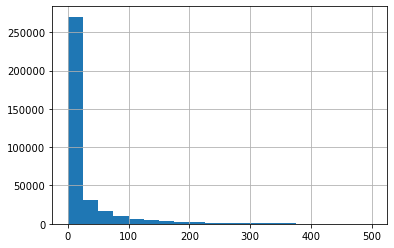

In [8]:
# Average number of stories read by user
read_per_user = interactions.groupby('user_id')['read_percent'].count()
statistics.mean(read_per_user.tolist())

# Distribution of read_percent per user
read_per_user.hist(bins=20, range=(0, 500))

**most users have read less than 100 stories**

<AxesSubplot:>

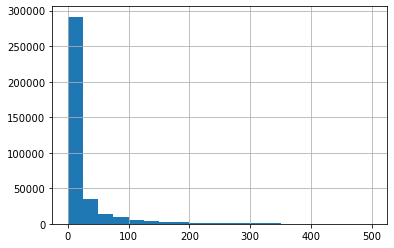

In [9]:
# Average number of users per story
read_per_story = interactions.groupby('pratilipi_id')['read_percent'].count()
statistics.mean(read_per_story.tolist())

# Distribution of read_percent per story
read_per_story.hist(bins=20, range=(0, 500))

**most stories have less than 100 readers**

# Reducing Data

In [10]:
# counts of readers per story as a df
read_per_story_df = pd.DataFrame(read_per_story)

# remove if < 200 readers
filtered_read_per_story_df = read_per_story_df[read_per_story_df.read_percent >= 200]

# build a list of pratilipi_ids to keep
popular_story = filtered_read_per_story_df.index.tolist()

In [11]:
# counts of stories read per user as a df
read_per_user_df = pd.DataFrame(read_per_user)

# remove if < 225
filtered_read_per_user_df = read_per_user_df[read_per_user_df.read_percent >= 225]

# build a list of user_ids to keep
prolific_users = filtered_read_per_user_df.index.tolist()

In [12]:
# Filtering out stories and users not in these lists.
filtered_interactions = interactions[interactions.pratilipi_id.isin(popular_story)]
filtered_interactions = interactions[interactions.user_id.isin(prolific_users)]
len(filtered_interactions)

2592314

**Reduced data by removing less interactive users and stories getting less number of readers**

In [13]:
l1 = set(new_metadata['pratilipi_id'])
l2 = set(interactions['pratilipi_id'])
len(l1.intersection(l2))

192851

In [14]:
len(metadata['pratilipi_id'].unique())

486693

In [15]:
len(interactions['pratilipi_id'].unique())

373138

In [16]:
interactions['pratilipi_id'].unique() in metadata['pratilipi_id'].unique()

C:\Users\HARSHI~1.IN\AppData\Local\Temp/ipykernel_41876/1451415105.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  interactions['pratilipi_id'].unique() in metadata['pratilipi_id'].unique()


False

**This implies that all the pratilipi_ids present in interactions do not have their metadata.**

# Collaborative Filtering

We can use Collaborative Filtering based recommender system, which compares items or users for their similarity.
For users, it attempts to find users with similar interests, and then recommends based on one user's interaction history to another.
For items, it attemps to find most similar items, and then it recommends users other similar products

In [17]:
from surprise import accuracy
from surprise.model_selection.validation import cross_validate
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import KNNWithMeans
reader = Reader()
surprise_data = Dataset.load_from_df(filtered_interactions[['user_id', 'pratilipi_id', 'read_percent']], reader)

In [18]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(surprise_data, test_size=.25, shuffle=False)

In [19]:
from collections import defaultdict

def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [20]:
class collab_filtering_based_recommender_model():
    def __init__(self, model, trainset, testset, data):
        self.model = model
        self.trainset = trainset
        self.testset = testset
        self.data = data
        self.pred_test = None
        self.recommendations = None
        self.top_n = None
        self.recommenddf = None

    def fit_and_predict(self):        
        printmd('**Fitting the train data...**', color='brown')
        self.model.fit(self.trainset)       

        printmd('**Predicting the test data...**', color='brown')
        self.pred_test = self.model.test(self.testset)        
        rmse = round(accuracy.rmse(self.pred_test), 3)
        printmd('**RMSE for the predicted result is ' + str(rmse) + '**', color='brown')   
        
        self.top_n = get_top_n(self.pred_test)
        self.recommenddf = pd.DataFrame(columns=['userId', 'productId', 'Rating'])
        for item in self.top_n:
            subdf = pd.DataFrame(self.top_n[item], columns=['productId', 'Rating'])
            subdf['userId'] = item
            cols = subdf.columns.tolist()
            cols = cols[-1:] + cols[:-1]
            subdf = subdf[cols]        
            self.recommenddf = pd.concat([self.recommenddf, subdf], axis = 0)        
        return rmse
        
    def cross_validate(self):
        printmd('**Cross Validating the data...**', color='brown')
        cv_result = cross_validate(self.model, self.data, n_jobs=-1)
        cv_result = round(cv_result['test_rmse'].mean(),3)
        printmd('**Mean CV RMSE is ' + str(cv_result)  + '**', color='brown')
        return cv_result

    def recommend(self, user_id, n=5):
        printmd('**Recommending top ' + str(n)+ ' products for userid : ' + user_id + ' ...**', color='brown')
        
        #df = pd.DataFrame(self.top_n[user_id], columns=['productId', 'Rating'])
        #df['UserId'] = user_id
        #cols = df.columns.tolist()
        #cols = cols[-1:] + cols[:-1]
        #df = df[cols].head(n)
        df = self.recommenddf[self.recommenddf['userId'] == user_id].head(n)
        display(df)
        return df

In [21]:
from surprise.model_selection import RandomizedSearchCV

def find_best_model(model, parameters,data):
    clf = RandomizedSearchCV(model, parameters, n_jobs=-1, measures=['rmse'])
    clf.fit(data)             
    print(clf.best_score)
    print(clf.best_params)
    print(clf.best_estimator)
    return clf

In [ ]:
sim_options = {
    "name": ["msd", "cosine", "pearson", "pearson_baseline"],
    "min_support": [3, 4, 5],
    "user_based": [True],
}
params = { 'k': range(30,50,1), 'sim_options': sim_options}
clf = find_best_model(KNNWithMeans, params, surprise_data)

In [ ]:
knnwithmeans = clf.best_estimator['rmse']
col_fil_knnwithmeans = collab_filtering_based_recommender_model(knnwithmeans, trainset, testset, surprise_data)

knnwithmeans_rmse = col_fil_knnwithmeans.fit_and_predict()

In [ ]:
params= {
    "n_epochs": [5, 10, 15, 20],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
clf = find_best_model(SVD, params, surprise_data)

In [ ]:
svd = clf.best_estimator['rmse']
col_fil_svd = collab_filtering_based_recommender_model(svd, trainset, testset, surprise_data)